# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Rizal Rifqiana Mutaqin
- **Email:** rizal.development@gmail.com
- **ID Dicoding:** l000ywl091

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap penyewaan sepeda ? 
- Penyewaan sepeda lebih banyak terjadi di Hari Kerja atau Hari Libur ? 
- Bagaimana tren penyewaan sepeda berdasarkan jam ?
- Bagaimana tren penyewaan dari bulan ke bulan dalam 2 tahun terakhir ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
#Load data day.csv
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#Load data hour.cs
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai Data day_df

**1. Mengecek tipe-tipe data pada Data day_df**

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**2. Mengecek missing values pada Data day_df**

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**3. Mengecek data duplikat pada Data day_df**

In [6]:
count_duplicated_day_df = day_df.duplicated().sum()
print(f"Jumlah Duplikasi pada Data day_df : {count_duplicated_day_df} data")

Jumlah Duplikasi pada Data day_df : 0 data


**4. Memeriksa parameter statistik pada Data day_df**

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Data hour_df

**1. Mengecek tipe-tipe data pada Data hour_df**

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**2. Mengecek missing values pada Data hour_df**

In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**3. Mengecek data duplikat pada Data hour_df**

In [10]:
hour_duplicated_hour_df = hour_df.duplicated().sum()
print(f"Jumlah Duplikasi pada Data hour_df : {hour_duplicated_hour_df} data")

Jumlah Duplikasi pada Data hour_df : 0 data


**4. Memeriksa parameter statistik pada Data hour_df**

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Kesimpulan Assessing Data:**
- Berdasarkan tahapan penilaian data pada data **day_df** dan **hour_df**, berikut rangkumannya:

| Data | Tipe Data | Missing Value | Duplicate data | Inaccurate value
|---|---|---|---|---|
| day_df | Ubah tipe data kolom **dteday** dari object menjadi datetime | - | - | - | - |
| hour_df | Ubah tipe data kolom **dteday** dari object menjadi datetime | - | - | - | - |


### Cleaning Data

**Insight:** Pada proses Cleansing Data terdapat beberapa yang dilakukan, berikut diantaranya:
- Ubah tipe data kolom dteday dari object menjadi datetime
- Menghapus kolom instant karena data tersebut tidak akan digunakan
- Mengubah nama kolom agar dapat mudah dibaca
- Mengubah nilai-nilai angka menjadi kategori

#### Membersihkan Data hour_df

**1. Ubah tipe data kolom dteday dari object menjadi datetime**

In [12]:
hour_df['dteday'] = pd.to_datetime(hour_df.dteday)
hour_df.info()
hour_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**2. Mengubah nama kolo-kolom**

In [13]:
hour_df.rename(columns={
    'dteday':'date_day',
    'yr':'year',
    'mnth':'month',
    'hr':'hour',
    'weekday':'day_of_the_week',
    'workingday':'working_day',
    'weathersit':'weather_situation',
    'hum':'humidity',
    'windspeed':'wind_speed',
    'casual':'user_casual',
    'registered':'user_registered',
    'cnt':'user_count'
}, inplace=True)
hour_df.head()

,instant,date_day,season,year,month,hour,holiday,day_of_the_week,working_day,weather_situation,temp,atemp,humidity,wind_speed,user_casual,user_registered,user_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**3. Mengubah nilai-nilai angka menjadi kategori**

In [14]:
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

hour_df['year'] = hour_df['year'].map({
    0: 2011, 1: 2012
})

hour_df['month'] = hour_df['month'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'Jun',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

hour_df['day_of_the_week'] = hour_df['day_of_the_week'].map({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})

hour_df['working_day'] = hour_df['working_day'].map({
    0: 'Holiday', 1: 'Working'
})

hour_df['weather_situation'] = hour_df['weather_situation'].map({
    1: 'Clear or Light Clouds', 2: 'Foggy or Cloudy with Mist', 3: 'Light Rain or Light Snow', 4: 'Heavy Rain or Snow with Fog'
})

hour_df['temp'] = hour_df['temp']*41

hour_df.head()


,instant,date_day,season,year,month,hour,holiday,day_of_the_week,working_day,weather_situation,temp,atemp,humidity,wind_speed,user_casual,user_registered,user_count
0,1,2011-01-01,Spring,2011,January,0,0,Saturday,Holiday,Clear or Light Clouds,9.84,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Saturday,Holiday,Clear or Light Clouds,9.02,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Saturday,Holiday,Clear or Light Clouds,9.02,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,Saturday,Holiday,Clear or Light Clouds,9.84,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,Saturday,Holiday,Clear or Light Clouds,9.84,0.2879,0.75,0.0,0,1,1


In [15]:
def classify_temp(temp):
    if temp < 10:
        return "Cold"
    elif temp >= 10 and temp < 20:
        return "Cool"
    elif temp >= 20 and temp < 30:
        return "Warm"
    else:
        return "Hot"
        
hour_df["temp_category"] = hour_df["temp"].apply(classify_temp)

hour_df.head()

,instant,date_day,season,year,month,hour,holiday,day_of_the_week,working_day,weather_situation,temp,atemp,humidity,wind_speed,user_casual,user_registered,user_count,temp_category
0,1,2011-01-01,Spring,2011,January,0,0,Saturday,Holiday,Clear or Light Clouds,9.84,0.2879,0.81,0.0,3,13,16,Cold
1,2,2011-01-01,Spring,2011,January,1,0,Saturday,Holiday,Clear or Light Clouds,9.02,0.2727,0.80,0.0,8,32,40,Cold
2,3,2011-01-01,Spring,2011,January,2,0,Saturday,Holiday,Clear or Light Clouds,9.02,0.2727,0.80,0.0,5,27,32,Cold
3,4,2011-01-01,Spring,2011,January,3,0,Saturday,Holiday,Clear or Light Clouds,9.84,0.2879,0.75,0.0,3,10,13,Cold
4,5,2011-01-01,Spring,2011,January,4,0,Saturday,Holiday,Clear or Light Clouds,9.84,0.2879,0.75,0.0,0,1,1,Cold


## Exploratory Data Analysis (EDA)

**Kelompokkan Penyewaan Berdasarkan Season**

In [16]:
hour_df.groupby(by="season").agg({
    "user_count":['min','max','sum','mean']
})

user_count                          
              min  max      sum        mean
season                                     
Fall            1  977  1061129  236.016237
Spring          1  801   471348  111.114569
Summer          1  957   918589  208.344069
Winter          1  967   841613  198.868856

Berdasarkan data diatas, penyewaan sepeda terbanyak terjadi pada musim Gugur.

**Kelompokkan Penyewaan Berdasarkan Tahun**

In [17]:
hour_df.groupby(by='year').agg({
    "user_casual":['min','max','sum','mean'],
    "user_registered":['min','max','sum','mean'],
    "user_count":['min','max','sum','mean']
})

user_casual                         user_registered                \
             min  max     sum       mean             min  max      sum   
year                                                                     
2011           0  272  247252  28.600578               0  567   995851   
2012           0  367  372765  42.679757               0  886  1676811   

                 user_count                            
            mean        min  max      sum        mean  
year                                                   
2011  115.193869          1  651  1243103  143.794448  
2012  191.986604          1  977  2049576  234.666361

Berdasarkan data diatas, penyewaa sepeda ada peningkatan dari tahun sebelumnya

**Kelompokkan Penyewaan Berdasarkan Bulan dan Tahun**

In [18]:
hour_df.groupby(by=['year','month']).agg({
    "user_casual":['min','max','sum','mean'],
    "user_registered":['min','max','sum','mean'],
    "user_count":['min','max','sum','mean']
})

user_casual                        user_registered       \
                       min  max    sum       mean             min  max   
year month                                                               
2011 April               0  240  22346  31.079277               0  486   
     August              0  196  28842  39.455540               0  549   
     December            0  115   8448  11.400810               0  462   
     February            0  108   6242   9.617874               0  275   
     January             0   47   3073   4.466570               0  247   
     July                0  248  36452  48.994624               1  517   
     Jun                 0  210  30612  42.516667               0  555   
     March               0  175  12826  17.569863               0  312   
     May                 0  237  31050  41.733871               1  540   
     November            0  191  15594  21.688456               1  523   
     October             0  272  25222  33.946164               1  553   
     September           0  245  26545  37.022315               0  567   
2012 April               0  355  38456  53.559889               1  697   
     August              0  289  43197  58.060484               2  811   
     December            0  167  13245  17.850404               1  737   
     February            0  229   8721  12.602601               1  567   
     January             0  156   8969  12.103914               1  518   
     July                0  269  41705  56.055108               1  790   
     Jun                 0  297  43294  60.130556               3  796   
     March               0  367  31618  42.554509               0  693   
     May                 0  361  44235  59.455645               1  770   
     November            0  304  21009  29.260446               0  709   
     October             0  362  34538  48.782486               1  876   
     September           0  350  43778  60.802778               3  886   

                                   user_count                           
                   sum        mean        min  max     sum        mean  
year month                                                              
2011 April       72524  100.867872          1  530   94870  131.947149  
     August     107849  147.536252          1  651  136691  186.991792  
     December    78875  106.443995          1  477   87323  117.844804  
     February    41973   64.673344          1  327   48215   74.291217  
     January     35116   51.040698          1  249   38189   55.507267  
     July       104889  140.979839          1  596  141341  189.974462  
     Jun        112900  156.805556          1  638  143512  199.322222  
     March       51219   70.163014          1  336   64045   87.732877  
     May        104771  140.821237          1  611  135821  182.555108  
     November    86573  120.407510          1  553  102167  142.095967  
     October     98289  132.286676          1  625  123511  166.232840  
     September  100873  140.687587          1  628  127418  177.709902  
2012 April      135768  189.091922          1  822  174224  242.651811  
     August     171306  230.250000          3  941  214503  288.310484  
     December   110468  148.878706          1  759  123713  166.729111  
     February    94416  136.439306          1  610  103137  149.041908  
     January     87775  118.454791          1  559   96744  130.558704  
     July       161902  217.610215          2  913  203607  273.665323  
     Jun        159536  221.577778          4  900  202830  281.708333  
     March      133257  179.349933          1  957  164875  221.904441  
     May        151630  203.803763          1  873  195865  263.259409  
     November   131655  183.363510          1  729  152664  212.623955  
     October    164303  232.066384          1  963  198841  280.848870  
     September  174795  242.770833          3  977  218573  303.573611

Berdasarkan data diatas, penyewaan sepeda tertinggi pada tahun 2011 terjadi pada pertengahan tahun yaitu bulan Juni dan pada tahun 2012 terjadi pada bulan September. Sedangkan penyewaan sepeda terendah terjadi pada bulan Januari baik tahun 2011 dan 2012.

**Kelompokkan Penyewaan Berdasarkan Jam**

In [19]:
hour_df.groupby(by="hour").agg({
    "user_casual":['min','max','sum','mean'],
    "user_registered":['min','max','sum','mean'],
    "user_count":['min','max','sum','mean']
})

user_casual                        user_registered               \
             min  max    sum       mean             min  max     sum   
hour                                                                   
0              0   68   7375  10.158402               0  234   31755   
1              0   49   4709   6.504144               0  139   19455   
2              0   44   3412   4.772028               0  104   12940   
3              0   26   1893   2.715925               0   61    6281   
4              0   13    874   1.253945               0   22    3554   
5              0   16   1012   1.411437               0   64   13249   
6              0   19   3017   4.161379               0  203   52115   
7              0   40   8037  11.055021               1  572  146134   
8              0   69  15761  21.679505               4  808  245240   
9              0  142  22458  30.891334               6  399  136980   
10             0  209  33789  46.477304               8  351   92468   
11             0  268  43286  59.540578               5  446  108034   
12             0  362  49718  68.293956               3  526  134696   
13             0  355  52713  72.308642               9  491  132206   
14             0  361  55089  75.567901              12  502  120563   
15             0  357  54606  74.905350               4  456  128543   
16             0  367  53834  73.745205               8  481  173914   
17             0  347  54220  74.273973              14  885  282640   
18             0  266  44496  61.120879              20  886  265276   
19             0  230  35505  48.770604              11  662  191284   
20             0  237  26378  36.233516               8  461  138172   
21             0  222  20570  28.255495               6  362  104875   
22             0  175  16200  22.252747               5  327   79412   
23             0   71  11065  15.199176               2  220   52876   

                 user_count                           
            mean        min  max     sum        mean  
hour                                                  
0      43.739669          2  283   39130   53.898072  
1      26.871547          1  168   24164   33.375691  
2      18.097902          1  132   16352   22.869930  
3       9.011478          1   79    8174   11.727403  
4       5.098996          1   28    4428    6.352941  
5      18.478382          1   66   14261   19.889819  
6      71.882759          1  213   55132   76.044138  
7     201.009629          1  596  154171  212.064649  
8     337.331499          5  839  261001  359.011004  
9     188.418157         14  426  159438  219.309491  
10    127.191197          8  539  126257  173.668501  
11    148.602476         10  663  151320  208.143054  
12    185.021978          3  776  184414  253.315934  
13    181.352538         11  760  184919  253.661180  
14    165.381344         12  750  175652  240.949246  
15    176.327846          7  750  183149  251.233196  
16    238.238356         11  783  227748  311.983562  
17    387.178082         15  976  336860  461.452055  
18    364.390110         23  977  309772  425.510989  
19    262.752747         11  743  226789  311.523352  
20    189.796703         11  567  164550  226.030220  
21    144.059066          6  584  125445  172.314560  
22    109.082418          9  502   95612  131.335165  
23     72.631868          2  256   63941   87.831044

Berdasarkan data dari tahun 2011-2012, jam tersibuk dalam penyewaan sepeda terjadi pada jam 17, sedangkan terluang pada jam 4.

**Kelompokkan Penyewaan Berdasarkan Holiday**

In [20]:
hour_df.groupby(by="holiday").agg({
    "user_casual":['min','max','sum','mean'],
    "user_registered":['min','max','sum','mean'],
    "user_count":['min','max','sum','mean']
})

user_casual                         user_registered                \
                min  max     sum       mean             min  max      sum   
holiday                                                                     
0                 0  367  597658  35.408377               0  886  2616586   
1                 0  272   22359  44.718000               0  601    56076   

                    user_count                           
               mean        min  max      sum       mean  
holiday                                                  
0        155.020203          1  977  3214244  190.42858  
1        112.152000          1  712    78435  156.87000

Berdasarkan data diatas, penyewaan sepeda pada hari libur lebih sedikit daripada hari kerja.

**Kelompokkan Penyewaan Berdasarkan Weekday/Weekend**

In [21]:
hour_df.groupby(by="working_day").agg({
    "user_casual":['min','max','sum','mean'],
    "user_registered":['min','max','sum','mean'],
    "user_count":['min','max','sum','mean']
})

user_casual                         user_registered                \
                    min  max     sum       mean             min  max      sum   
working_day                                                                     
Holiday               0  367  316732  57.441422               0  601   683537   
Working               0  264  303285  25.561315               0  886  1989125   

                        user_count                            
                   mean        min  max      sum        mean  
working_day                                                   
Holiday      123.963910          1  783  1000269  181.405332  
Working      167.646439          1  977  2292410  193.207754

Berdasarkan data diatas, penyewaan sepeda pada hari kerja lebih banyak daripada hari libur.

**Kelompokkan Penyewaan Berdasarkan Hari**

In [22]:
hour_df.groupby(by="day_of_the_week").agg({
    "user_casual":['min','max','sum','mean'],
    "user_registered":['min','max','sum','mean'],
    "user_count":['min','max','sum','mean']
})

user_casual                         user_registered       \
                        min  max     sum       mean             min  max   
day_of_the_week                                                            
Friday                    0  264   78238  31.458786               0  757   
Monday                    0  272   70784  28.553449               0  857   
Saturday                  0  367  153852  61.246815               0  491   
Sunday                    0  317  140521  56.163469               0  526   
Thursday                  0  154   61460  24.872521               0  885   
Tuesday                   0  178   57843  23.580514               0  871   
Wednesday                 0  237   57319  23.159192               0  886   

                                    user_count                           
                    sum        mean        min  max     sum        mean  
day_of_the_week                                                          
Friday           409552  164.677121          1  957  487790  196.135907  
Monday           384719  155.191206          1  968  455503  183.744655  
Saturday         323955  128.962978          1  783  477807  190.209793  
Sunday           303506  121.305356          1  776  444027  177.468825  
Thursday         423935  171.564144          1  976  485395  196.436665  
Tuesday          411266  167.658377          1  970  469109  191.238891  
Wednesday        415729  167.971313          1  977  473048  191.130505

Berdasarkan data diatas, hari Jumat menjadi hari terbanyak dalam penyewaan sepeda. 

**Kelompokkan Penyewaan Berdasarkan Situasi Cuaca**

In [23]:
hour_df.groupby(by='weather_situation').agg({
    "user_casual":['min','max','sum','mean'],
    "user_registered":['min','max','sum','mean'],
    "user_count":['min','max','sum','mean']
})

user_casual                          \
                                    min  max     sum       mean   
weather_situation                                                 
Clear or Light Clouds                 0  367  462745  40.545431   
Foggy or Cloudy with Mist             0  350  134481  29.595290   
Heavy Rain or Snow with Fog           1    6       8   2.666667   
Light Rain or Light Snow              0  263   22783  16.055673   

                            user_registered                            \
                                        min  max      sum        mean   
weather_situation                                                       
Clear or Light Clouds                     0  886  1875428  164.323841   
Foggy or Cloudy with Mist                 0  822   661471  145.570202   
Heavy Rain or Snow with Fog              22  158      215   71.666667   
Light Rain or Light Snow                  0  791   135548   95.523608   

                            user_count                            
                                   min  max      sum        mean  
weather_situation                                                 
Clear or Light Clouds                1  977  2338173  204.869272  
Foggy or Cloudy with Mist            1  957   795952  175.165493  
Heavy Rain or Snow with Fog         23  164      223   74.333333  
Light Rain or Light Snow             1  891   158331  111.579281

Berdasarkan data diatas, penyewaan sepeda terbanyak terjadi pada saat cuaca cerah.

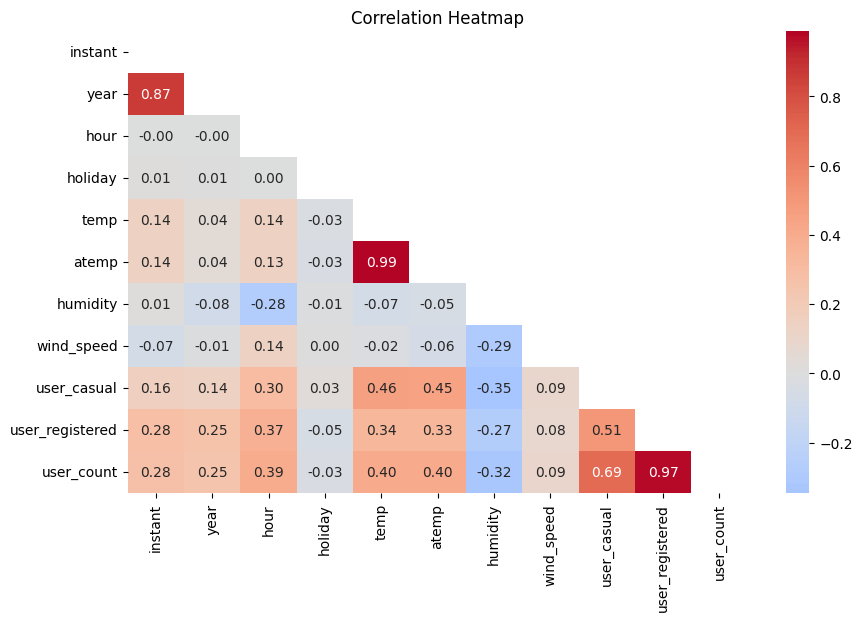

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = hour_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Berdasarkan diagram diatas, didapatkan analisa berikut:
- **atemp** dan **temp** sangat berkorelasi, diikuti dengan **user_registered** dan **user_count**
- **humidity** tidak berkorelasi dengan **user_count**, **user_casual**, dan **wind_speed**

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap penyewaan sepeda ? 

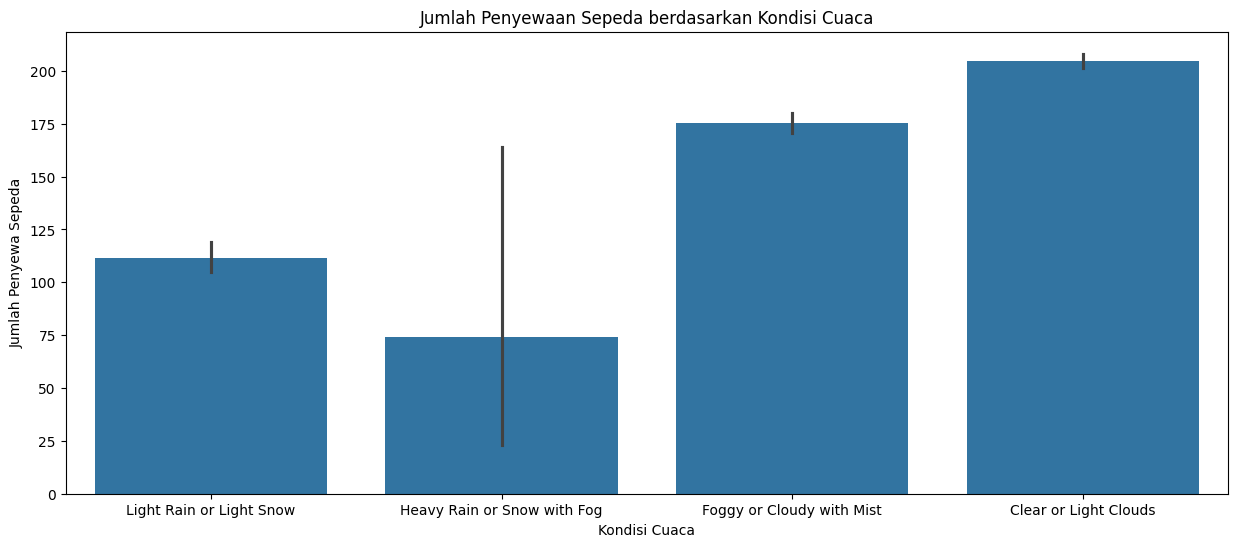

In [25]:
y = hour_df['user_count'] 

norm = plt.Normalize(y.min(), y.max())
cmap = plt.get_cmap("magma")

plt.figure(figsize=(15,6))
sns.barplot(
    x='weather_situation',
    y='user_count',
    data=hour_df.sort_values(by="weather_situation", ascending=False))

plt.title('Jumlah Penyewaan Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.show()

### Pertanyaan 2: Penyewaan sepeda lebih banyak terjadi di Hari Kerja atau Hari Libur ? 

In [26]:
seasonal_usage = hour_df.groupby('working_day')[['user_registered', 'user_casual']].sum()
seasonal_usage.head(100)

,user_registered,user_casual
working_day,,
Holiday,683537,316732
Working,1989125,303285


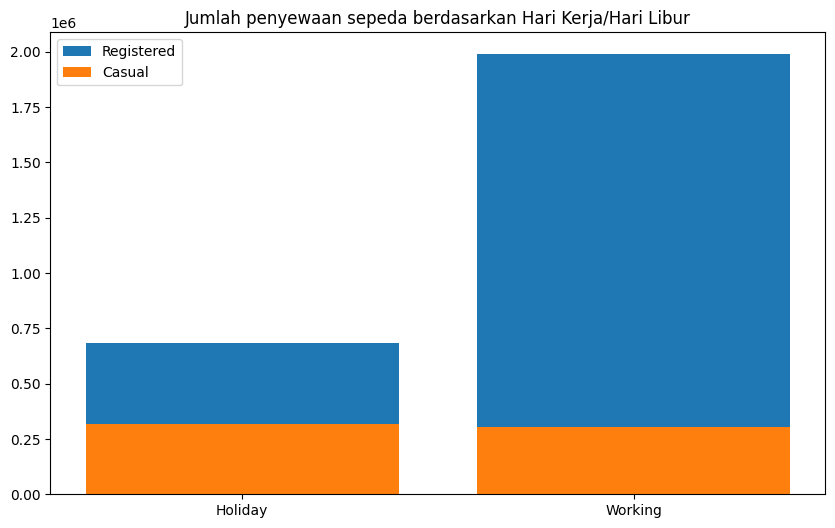

In [27]:
working_holiday_df = hour_df.groupby('working_day')[['user_registered', 'user_casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

plt.bar(
    working_holiday_df['working_day'],
    working_holiday_df['user_registered'],
    label='Registered',
    color='tab:blue'
)

plt.bar(
    working_holiday_df['working_day'],
    working_holiday_df['user_casual'],
    label='Casual',
    color='tab:orange'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewaan sepeda berdasarkan Hari Kerja/Hari Libur')
plt.legend()
plt.show()

### Pertanyaan 3: Bagaimana tren penyewaan sepeda berdasarkan jam ?

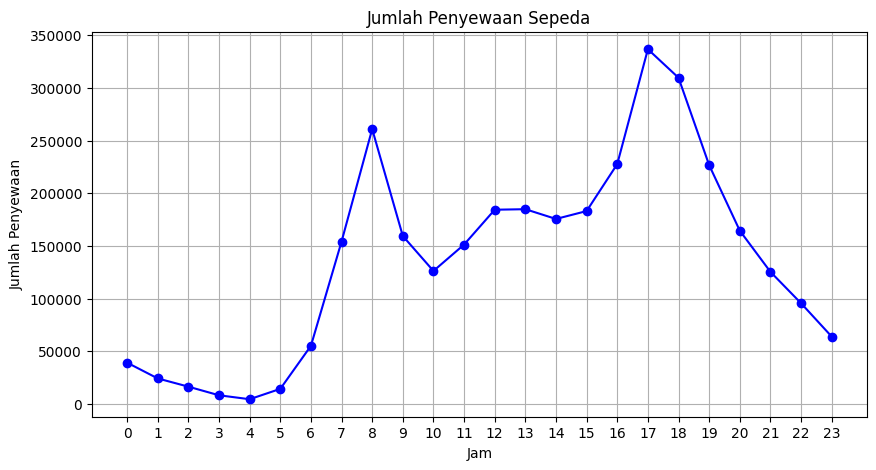

In [28]:
sum_order_items_df = hour_df.groupby("hour").user_count.sum()

plt.figure(figsize=(10, 5))
plt.plot(sum_order_items_df.index, sum_order_items_df.values, marker="o", linestyle="-", color="b")

plt.title("Jumlah Penyewaan Sepeda")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(sum_order_items_df.index)  # Menampilkan semua jam di sumbu X
plt.grid(True)

plt.show()

#### Pertanyaan 4: Bagaimana tren penyewaan dari bulan ke bulan dalam 2 tahun terakhir ?

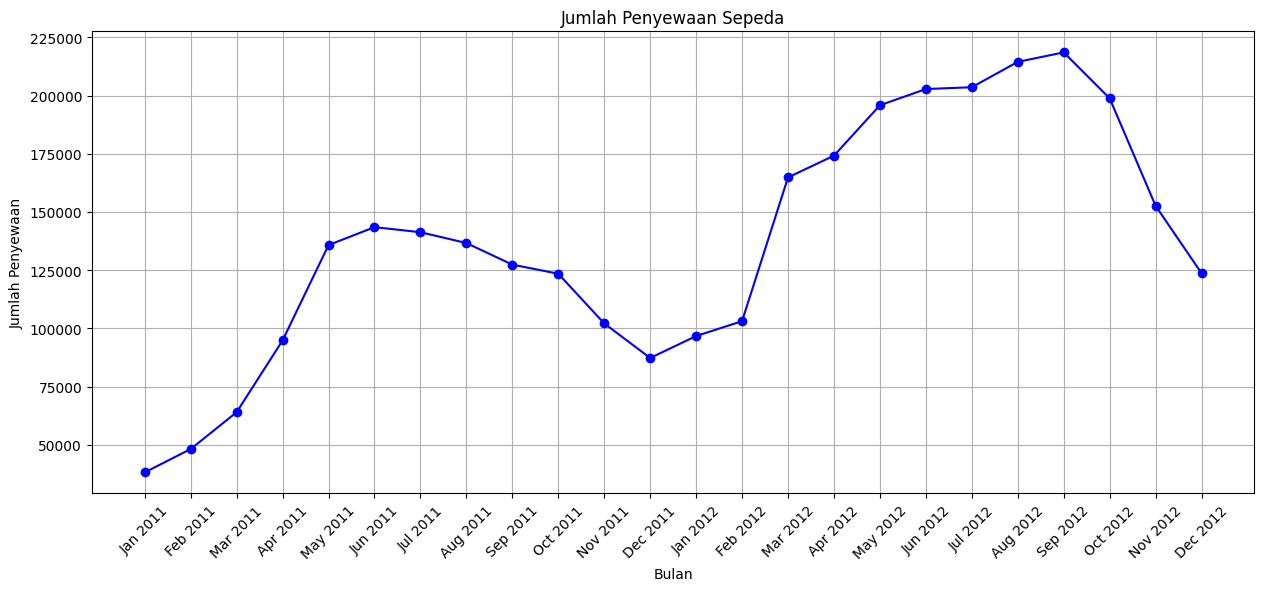

In [29]:
hour_df["month_year"] = hour_df["date_day"].dt.strftime("%b %Y")

monthly_data = hour_df.groupby("month_year")["user_count"].sum().reset_index()
monthly_data["month_year"] = pd.to_datetime(monthly_data["month_year"], format="%b %Y")
monthly_data = monthly_data.sort_values(by="month_year")
monthly_data["month_year"] = monthly_data["month_year"].dt.strftime("%b %Y")

plt.figure(figsize=(15, 6))
plt.plot(monthly_data.month_year, monthly_data.user_count, marker="o", linestyle="-", color="b")

plt.title("Jumlah Penyewaan Sepeda")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(monthly_data.index)  # Menampilkan semua jam di sumbu X
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

## Analisis Lanjutan (Opsional)

**1. Analisis Clustering**

**Total Pengguna Berdasarkan Kategori Suhu**

In [30]:
hour_df.groupby(by='temp_category').agg({
    "user_count" : "sum"
})

,user_count
temp_category,
Cold,140901
Cool,910555
Hot,694404
Warm,1546819


Berdasarkan data diatas, penyewaan sepeda banyak terjadi pada suhu Hangat, dilanjutkan pada suhu Sejuk, Panas, dan Dingin.

**2. Analisis RFM**

   user_registered  recency  frequency  monetary
0                0       38         24        35
1                1        0        201       294
2                2        1        245       648
3                3        0        294      1154
4                4        3        307      1602


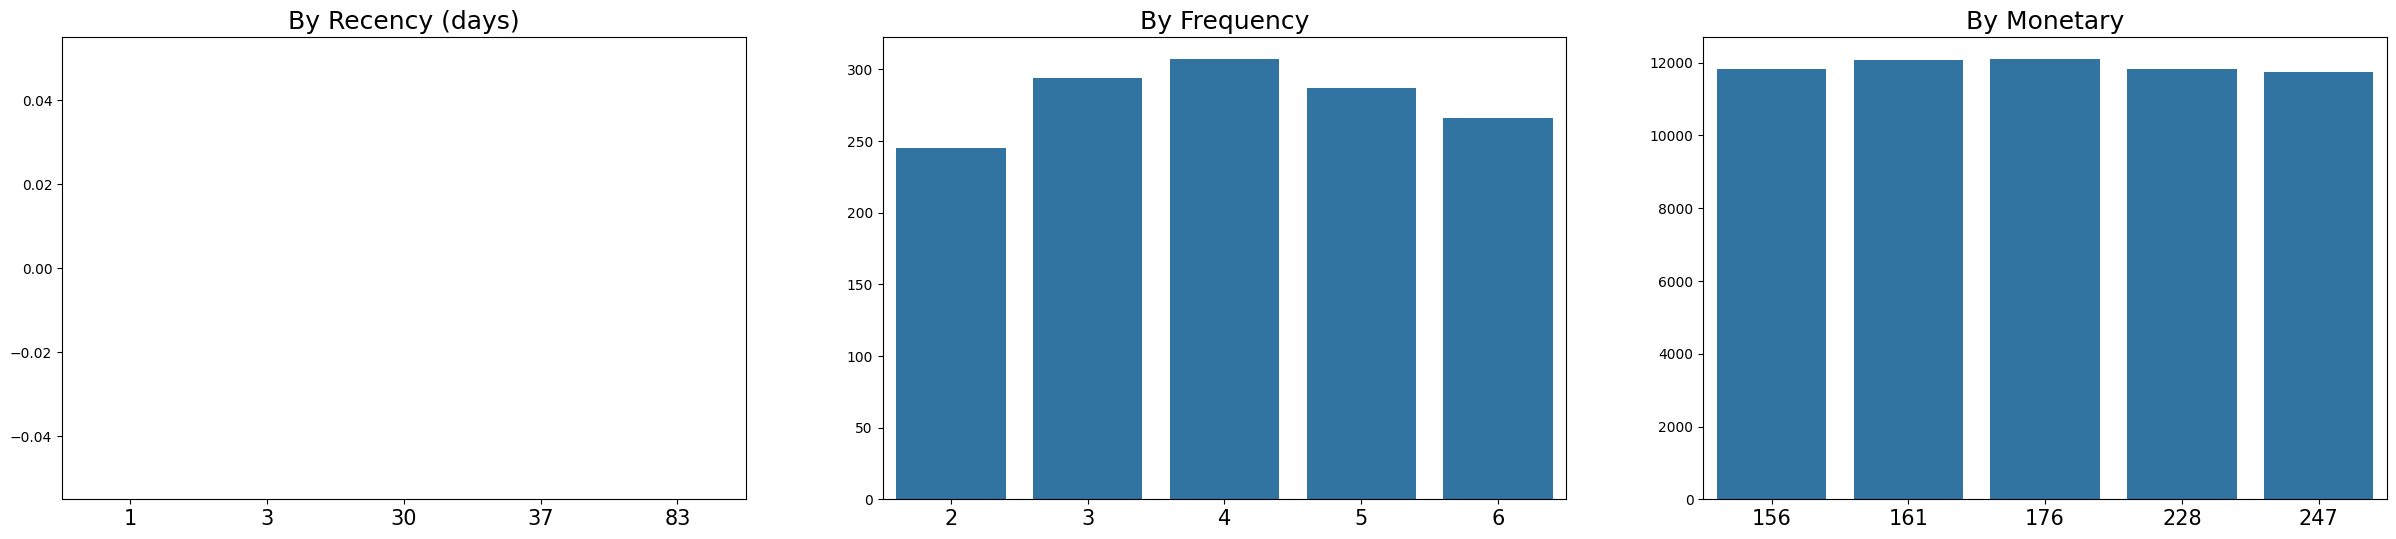

In [37]:
current_date = max(hour_df['date_day'])
rfm_df = hour_df.groupby('user_registered').agg({
    'date_day': lambda x: (current_date - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'user_count': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['user_registered', 'recency', 'frequency', 'monetary']

print(rfm_df.head())

ig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
sns.barplot(y="recency", x="user_registered", data=rfm_df.sort_values(by="recency", ascending=True).head(5), ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(y="frequency", x="user_registered", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(y="monetary", x="user_registered", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.show()

## Conclusion

**Bagaimana pengaruh cuaca terhadap penyewaan sepeda ?**

Berdasarkan grafik, dapat disimpulkan bahwa kondisi cuaca berpengaruh terhadap jumlah penyewaan sepeda. Penyewaan sepeda cenderung lebih tinggi pada cuaca cerah atau berawan ringan, sedangkan jumlah penyewaan menurun saat cuaca kurang bersahabat, seperti hujan atau salju.
Penyewaan sepeda paling sedikit terjadi pada kondisi hujan lebat atau salju dengan kabut, kemungkinan karena faktor kenyamanan dan keamanan. Selain itu, terdapat variabilitas yang cukup besar pada jumlah penyewaan dalam kondisi cuaca ekstrem, yang mungkin dipengaruhi oleh faktor lain seperti hari kerja atau akhir pekan.
Untuk meningkatkan jumlah penyewaan sepeda, penyedia layanan dapat mempertimbangkan strategi promosi atau diskon saat cuaca kurang mendukung. Selain itu, peningkatan fasilitas keselamatan, seperti penyediaan jas hujan atau tempat parkir yang lebih aman, dapat membantu meningkatkan minat pengguna untuk tetap menggunakan sepeda dalam berbagai kondisi cuaca. Secara keseluruhan, semakin baik kondisi cuaca, semakin tinggi pula jumlah penyewaan sepeda.

**Penyewaan sepeda lebih banyak terjadi di Hari Kerja atau Hari Libur ?**

Berdasarkan grafik jumlah penyewaan sepeda berdasarkan hari kerja dan hari libur, terlihat bahwa jumlah penyewaan secara keseluruhan lebih tinggi pada hari kerja dibandingkan hari libur. Penyewa yang terdaftar (registered) mendominasi jumlah penyewaan terutama pada hari kerja, menunjukkan bahwa sepeda lebih banyak digunakan oleh pelanggan tetap, kemungkinan besar untuk keperluan transportasi sehari-hari seperti perjalanan ke tempat kerja atau sekolah. Sementara itu, penyewa kasual (casual) lebih merata antara hari kerja dan hari libur, meskipun jumlahnya tetap lebih rendah dibandingkan penyewa terdaftar. Pada hari libur, jumlah penyewaan oleh penyewa kasual lebih tinggi dibandingkan pada hari kerja, yang dapat mengindikasikan bahwa sepeda lebih banyak digunakan untuk rekreasi atau aktivitas santai di akhir pekan. Secara keseluruhan, data ini menunjukkan bahwa pola penggunaan sepeda sangat dipengaruhi oleh jadwal kerja dan kebutuhan transportasi rutin.

**Bagaimana tren penyewaan sepeda berdasarkan jam ?**

Berdasarkan grafik jumlah penyewaan sepeda berdasarkan jam, terlihat bahwa pola penyewaan memiliki dua puncak utama, yaitu pada pagi hari sekitar pukul 07:00–08:00 dan sore hari sekitar pukul 17:00–18:00. Hal ini menunjukkan bahwa penggunaan sepeda meningkat pada jam-jam sibuk, kemungkinan besar terkait dengan aktivitas perjalanan ke dan dari tempat kerja atau sekolah. Pada tengah malam hingga dini hari (00:00–05:00), jumlah penyewaan berada pada titik terendah, sementara mulai meningkat secara bertahap sejak pukul 06:00. Setelah mencapai puncak pertama di pagi hari, jumlah penyewaan mengalami penurunan sebelum kembali stabil pada siang hari. Puncak kedua terjadi di sore hari, yang kemungkinan besar disebabkan oleh aktivitas pulang kerja atau sekolah. Setelah itu, jumlah penyewaan kembali menurun secara bertahap hingga malam hari. Pola ini menunjukkan bahwa sepeda banyak digunakan sebagai moda transportasi utama selama jam sibuk.

**Bagaimana tren penyewaan dari bulan ke bulan dalam 2 tahun terakhir ?**

Berdasarkan grafik jumlah penyewaan sepeda dari Januari 2011 hingga Desember 2012, terlihat adanya pola musiman dalam tren penyewaan. Jumlah penyewaan mengalami peningkatan signifikan dari awal tahun hingga pertengahan tahun. Tren ini berulang pada tahun berikutnya dengan pola yang serupa, di mana penyewaan kembali meningkat di awal tahun hingga pertengahan tahun 2012 dan mencapai titik tertinggi sebelum akhirnya menurun di akhir tahun. Pola ini menunjukkan bahwa faktor musiman, seperti cuaca dan kondisi lingkungan, sangat mempengaruhi tingkat penyewaan sepeda.

In [32]:
hour_df.to_csv("hour_data.csv", index=False)
day_df.to_csv("day_data.csv", index=False)
